In [2]:
from os import walk
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import find_peaks
from scipy import constants

In [3]:
mu_0 = constants.mu_0
N = 80
r = 0.09
R = 1.682
calc_B = lambda U : U * mu_0 * (4/5) ** (3/2) * N/(r * R)

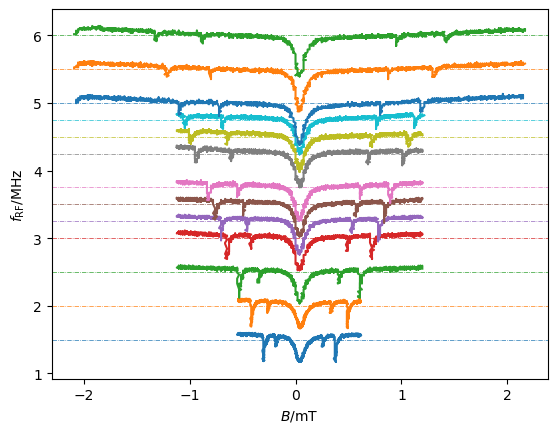

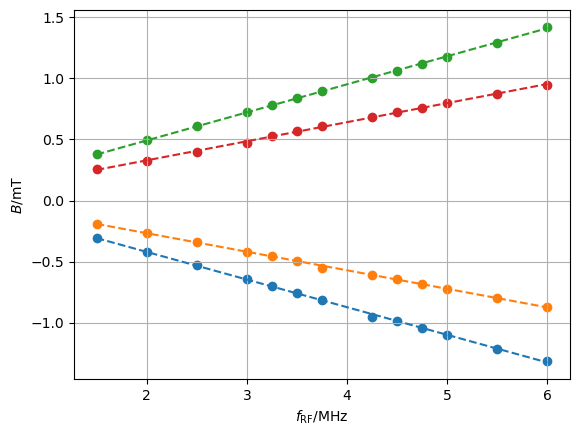

In [5]:
path = '../data/Magnetfeldvariation'
filenames = next(walk(path))[2]
b1 = []
b2 = []
b3 = []
b4 = []
f = []
fig1, ax1 = plt.subplots()
for i, filename in enumerate(filenames):
    color=next(ax1._get_lines.prop_cycler)['color']
    freq = float(filename.replace(',', '.'))
    data = np.loadtxt(path + '/' + filename)

    first = 0
    last  = -1
    if freq >= 5000:
        first = 90
        last = -90


    transmission = data[first:last, 2]
    time = data[first:last, 0]
    magnetic_field = data[first:last, 1] / 10


    ax1.plot(calc_B(magnetic_field) * 1e3, ((transmission - transmission.mean())/transmission.std() * 100 + freq) *1e-3, color=color)
    ax1.axhline(y = freq *1e-3, linestyle = '-.', linewidth = '0.5', color=color)

    lowest_transmisstion_peaks, _ = find_peaks(-transmission, distance= 200)
    lowest_5_transmission_peaks = lowest_transmisstion_peaks[(transmission[lowest_transmisstion_peaks]).argsort()[:5]]


    f.append(float(filename.replace(',', '.')) * 1000) # khz

    lowest_5_transmission_peaks.sort()
    #ax1.axvline(calc_B(magnetic_field[lowest_5_transmission_peaks][1])*1e3, color=color)

    b1.append(calc_B(magnetic_field[lowest_5_transmission_peaks[0]]))
    b2.append(calc_B(magnetic_field[lowest_5_transmission_peaks[1]]))
    b3.append(calc_B(magnetic_field[lowest_5_transmission_peaks[-1]]))
    b4.append(calc_B(magnetic_field[lowest_5_transmission_peaks[-2]]))

ax1.set(xlabel='$B / \mathrm{mT}$', ylabel='$f_\mathrm{RF} / \mathrm{MHz}$')

fig1.savefig('../output/overview_magneticfield_variation.svg')

fig2, ax = plt.subplots()
ax.set(xlabel='$f_\mathrm{RF} / \mathrm{MHz}$', ylabel='$B / \mathrm{mT}$')
slope1, intercept1, r1, p1, std_err1 = stats.linregress(f, b1)
f = np.array(f)
ax.plot(f * 1e-6, (slope1 * np.array(f) + intercept1)* 1e3, '--')
ax.scatter(f* 1e-6, np.array(b1) * 1e3)

slope2, intercept2, r2, p2, std_err2 = stats.linregress(f, b2)
ax.plot(f* 1e-6, (slope2 * np.array(f) + intercept2)* 1e3, '--')
ax.scatter(f* 1e-6, np.array(b2)* 1e3)

slope3, intercept3, r3, p3, std_err3 = stats.linregress(f, b3)
ax.plot(f* 1e-6, (slope3 * np.array(f) + intercept3)* 1e3, '--')
ax.scatter(f* 1e-6, np.array(b3)* 1e3)



slope4, intercept4, r4, p4, std_err4 = stats.linregress(f, b4)
ax.plot(f* 1e-6, (slope4 * np.array(f) + intercept4)* 1e3, '--')
ax.scatter(f* 1e-6, np.array(b4)* 1e3)
ax.grid()
fig2.savefig('../output/lin_reg_magneticfield_variation.svg')


In [ ]:
slopes = [slope1, slope2, slope3, slope4]
print(slopes)

In [ ]:
mu_b, _, _ = constants.physical_constants['Bohr magneton']
gf = lambda a : constants.h / (mu_b * a)

In [ ]:
print(gf(np.array(slopes)))